In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2015.csv


In [2]:
path1 = "../input/world-happiness/2015.csv"
y_5 = pd.read_csv(path1)

In [3]:
import math 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
y_5.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
y_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
y_5.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# **Exploratory Data Analysis and Visualization**

**Before we start our analysis, the most confusing thing you would ever encoounter is from where to start. Basically, there is so much data to look upon that it's quite normal to be confused, but, not anymore. Firstly, if you have no idea about the features ,tackle the target variable(in our case, Happiness score or rank), then think about what factors are responsible for this trend in that variable(Check correlation between the variables through Heatmap). Once you would do these things, you would gain slight insights from the data which would be result in more relations and once, this flow is started, you would be unstoppable!**

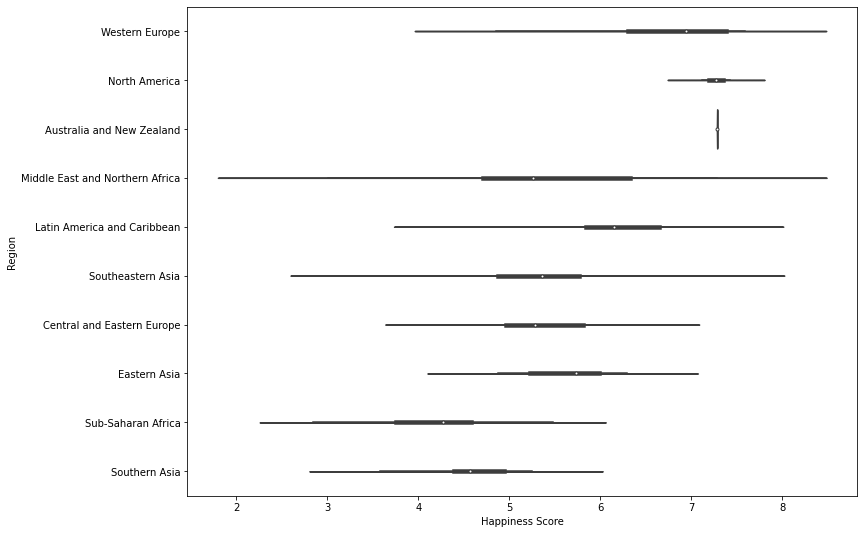

In [7]:
# Happiness score across Regions

plt.figure(figsize=(12,9))
sns.violinplot(y_5['Happiness Score'], y_5['Region'])
plt.show()

In [8]:
# Getting Countries with more than 84% of Happiness scores
reg_5 = y_5.loc[y_5['Happiness Score'] > 6.3]
reg_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
# Regions with most no. of happy countries
reg_5['Region'].value_counts()

Western Europe                     16
Latin America and Caribbean         9
Middle East and Northern Africa     5
Southeastern Asia                   2
North America                       2
Australia and New Zealand           2
Central and Eastern Europe          1
Name: Region, dtype: int64

In [10]:
# Getting countries in regions having 6.3+ scores
west_euro = y_5.loc[(y_5['Region'] == 'Western Europe') & (y_5['Happiness Score'] > 6.3)] 
print('Total countries in Western Europe with more than 6.3+ score :',len(west_euro.index))

latin_america = y_5.loc[(y_5['Region'] == 'Latin America and Caribbean') & (y_5['Happiness Score'] > 6.3)]
print('Total countries in Latin America and Caribbean with more than 6.3+ score :',len(latin_america.index))

middle_east = y_5.loc[(y_5['Region'] == 'Middle East and Northern Africa') & (y_5['Happiness Score'] > 6.3)]
print('Total countries in Middle East and Northern Africa with more than 6.3+ score :',len(middle_east.index))

southeast_asia = y_5.loc[(y_5['Region'] == 'Southeastern Asia') & (y_5['Happiness Score'] > 6.3)]
print('Total countries in Southeastern Asia with more than 6.3+ score :',len(southeast_asia.index))

Total countries in Western Europe with more than 6.3+ score : 16
Total countries in Latin America and Caribbean with more than 6.3+ score : 9
Total countries in Middle East and Northern Africa with more than 6.3+ score : 5
Total countries in Southeastern Asia with more than 6.3+ score : 2


Text(0.5, 1.0, 'Regions containing most no. of countries with 6.3+ scores')

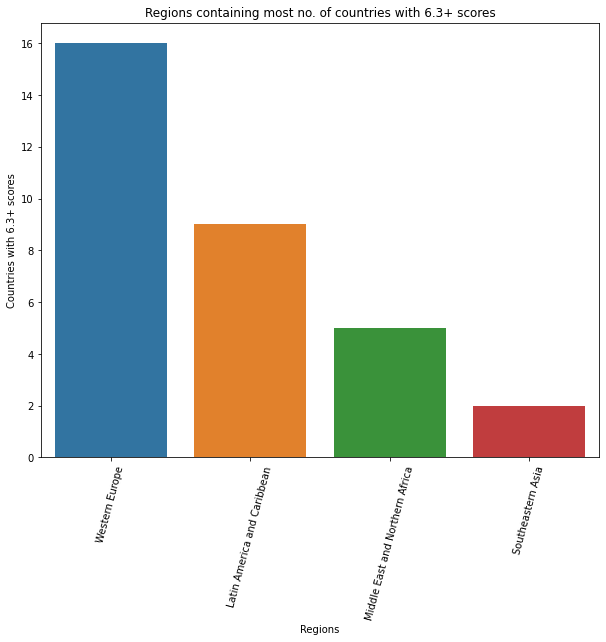

In [11]:
# Creating a dataframe containing regions with countries having 6.3+ scores
top_4 = pd.DataFrame({'Region':['Western Europe', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'Southeastern Asia']
                      ,'Countries':[len(west_euro.index), len(latin_america.index), len(middle_east.index), len(southeast_asia.index)]})

# Visualizing this dataframe
plt.figure(figsize=(10,8))
sns.barplot(x=top_4['Region'],y=top_4['Countries'],data=top_4)
plt.ylabel('Countries with 6.3+ scores')
plt.xlabel('Regions')
plt.xticks(rotation = 75)
plt.title('Regions containing most no. of countries with 6.3+ scores')

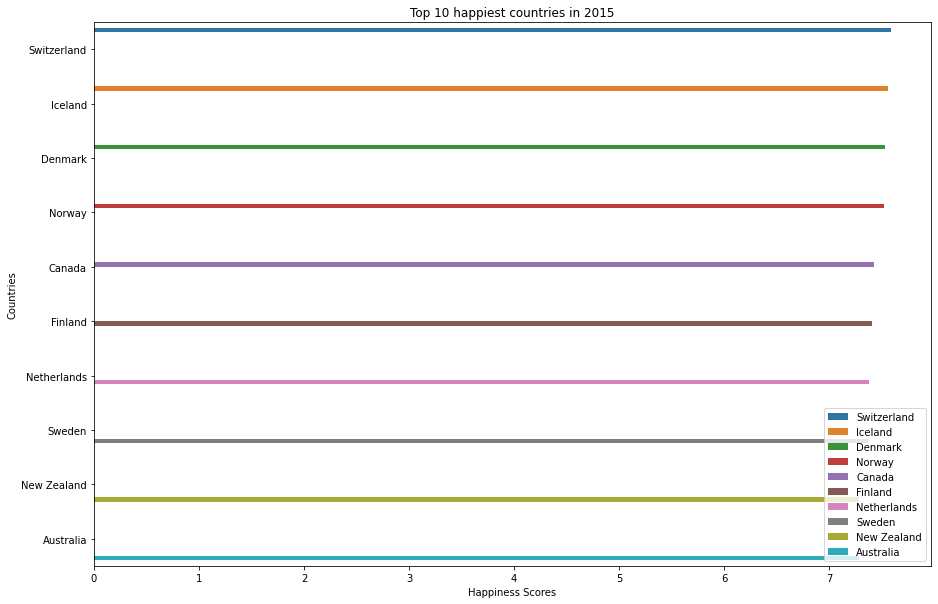

In [12]:
#  Getting top 10 happiest countries in the world
happy_10 = y_5.sort_values(by='Happiness Score',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Happiness Score',y='Country',data=happy_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Happiness Scores')
plt.ylabel('Countries')
plt.title('Top 10 happiest countries in 2015')
plt.show()

*Switzerland is the happiest country with a happiness score of 7.57(approx.)*

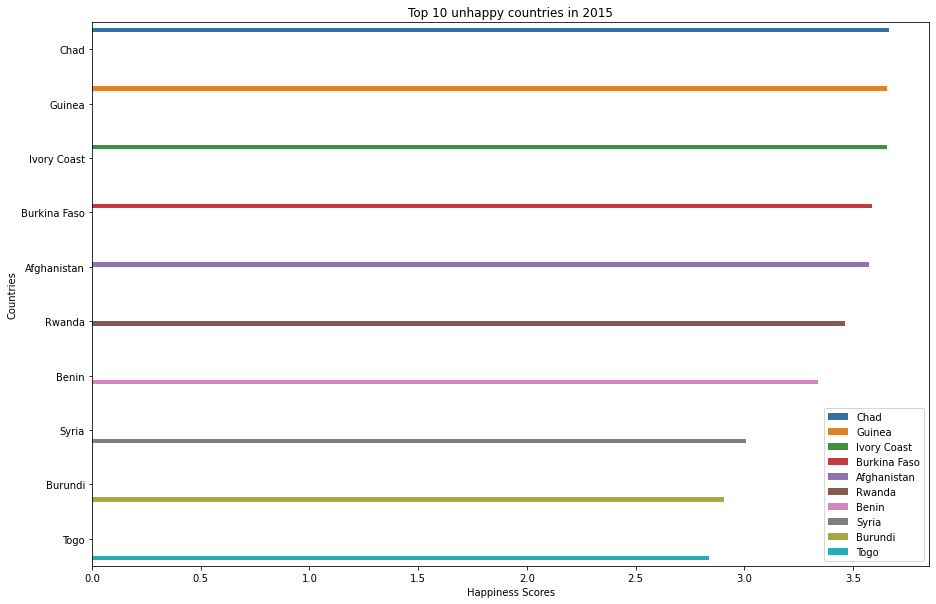

In [13]:
# Getting top 10 unhappy countries in the world
sad_10 = y_5.sort_values(by='Happiness Score',ascending=False).tail(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Happiness Score',y='Country',data=sad_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Happiness Scores')
plt.ylabel('Countries')
plt.title('Top 10 unhappy countries in 2015')
plt.show()

*Togo is the most unhappy country with a happiness score of 2.8(approx.)*

**Now, let's take a look at what Economy has to do with Happiness.**

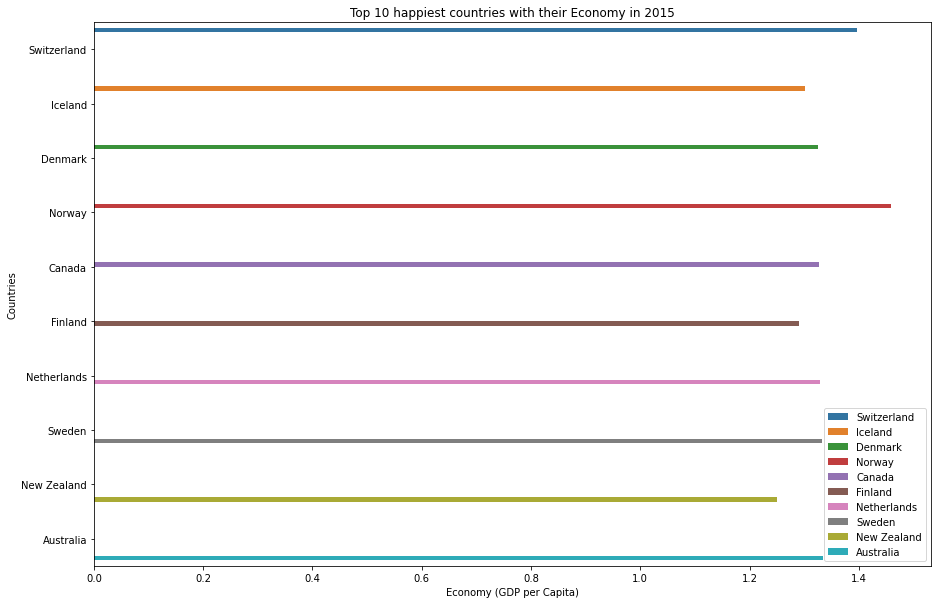

In [14]:
#  Getting top 10 happiest countries' Economy in the world
happy_10 = y_5.sort_values(by='Happiness Score',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',data=happy_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Countries')
plt.title('Top 10 happiest countries with their Economy in 2015')
plt.show()

*The most surprising thing I have seen in this plot is that it is not necessary that the most developed nations will also be the most happiest.There are nations with more GDP per capita than Switzerland but still behind him.*

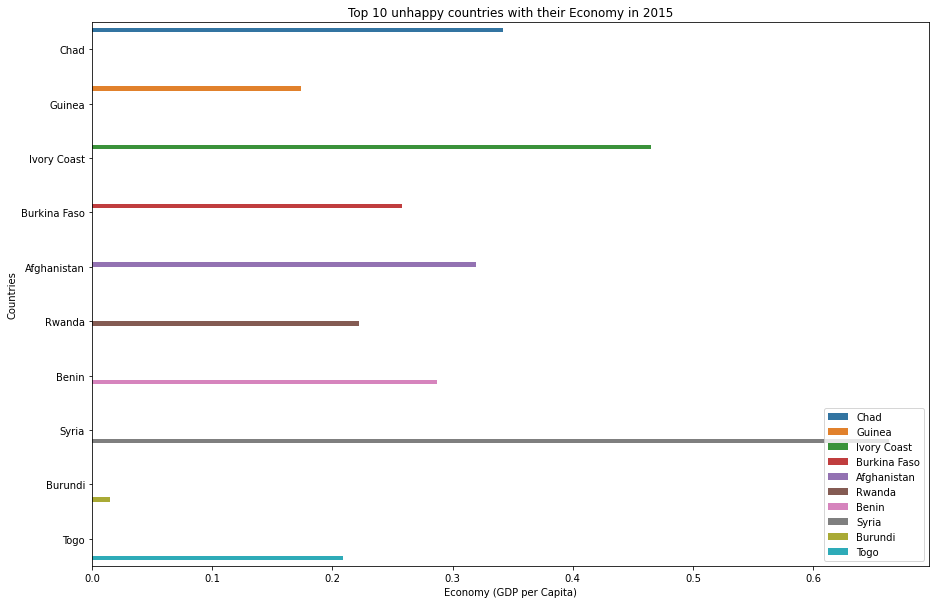

In [15]:
# Getting top 10 unhappy countries' Economy in the world
sad_10 = y_5.sort_values(by='Happiness Score',ascending=False).tail(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',data=sad_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Countries')
plt.title('Top 10 unhappy countries with their Economy in 2015')
plt.show()

*Syria has a decent GDP per capita of around 0.75 but still it is the top 3 unhappy countries(maybe because of the Trust and Freedom, we will explore it later).*

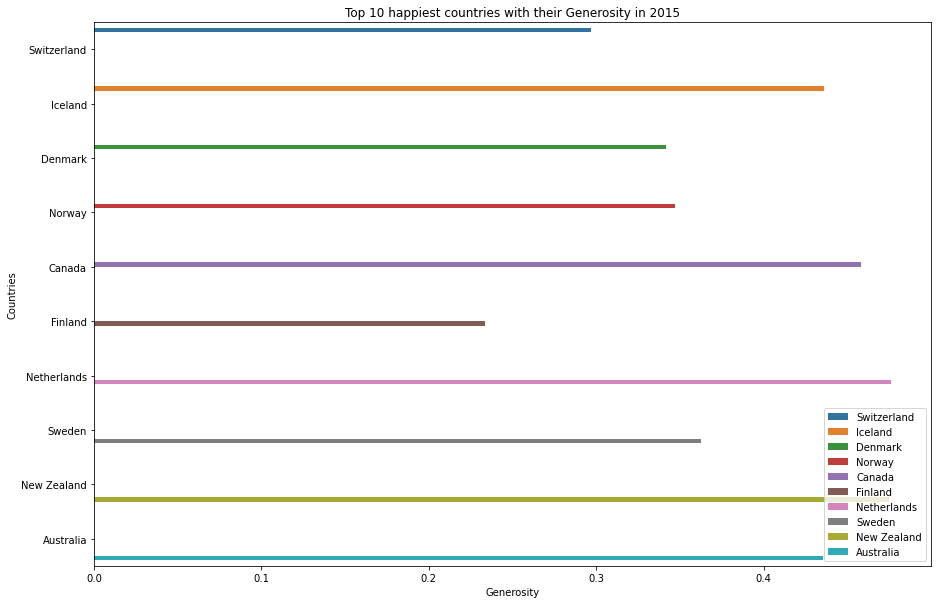

In [16]:
#  Getting top 10 happiest countries' Generosity in the world
happy_10 = y_5.sort_values(by='Happiness Score',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Generosity',y='Country',data=happy_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Generosity')
plt.ylabel('Countries')
plt.title('Top 10 happiest countries with their Generosity in 2015')
plt.show()

*Confusing trends have been shown by Generosity, hence, no conclusion can be drawn.*

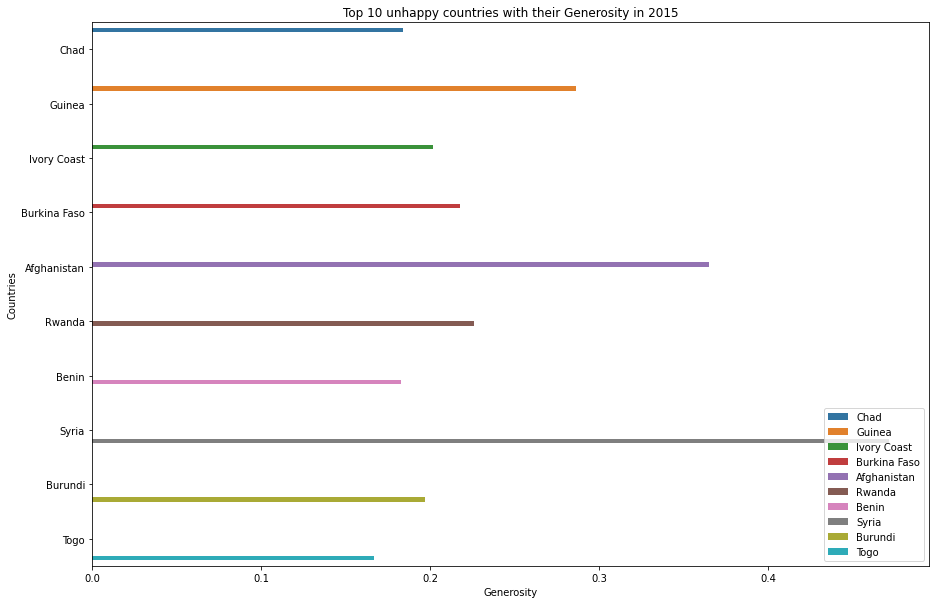

In [17]:
#  Getting top 10 unhappy countries' Generosity in the world
sad_10 = y_5.sort_values(by='Happiness Score',ascending=False).tail(10)
plt.figure(figsize=(15,10))
sns.barplot(x='Generosity',y='Country',data=sad_10,hue='Country')
plt.legend(loc='lower right')
plt.xlabel('Generosity')
plt.ylabel('Countries')
plt.title('Top 10 unhappy countries with their Generosity in 2015')
plt.show()

*Though Syria is showing some great trends, still it is placed in the worst 3 according to happiness rank. We will discover the reason for the placement of Syria in the worst 3, later in this notebook.*

**Bivariate Analysis**

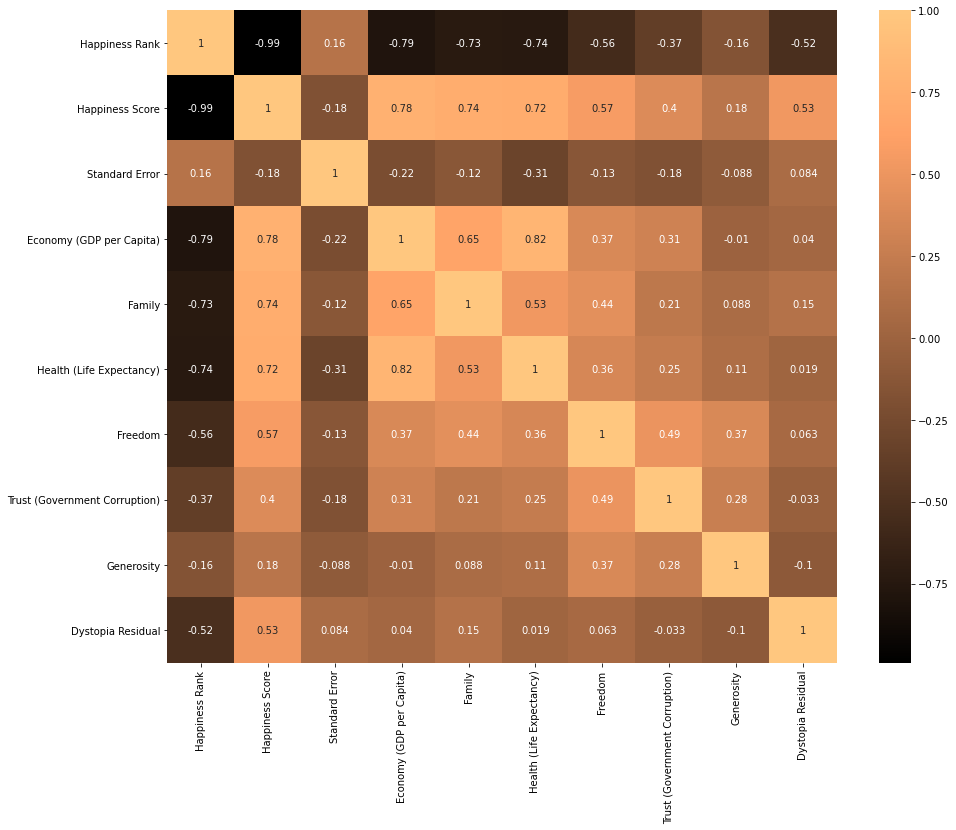

In [18]:
# Checking correlation between different variables
plt.figure(figsize=(15,12))
sns.heatmap(y_5.corr(), cmap = 'copper', annot = True)
plt.show()

*The highly correlated features with happiness scores are Economy, Family and Health. Other important factors to keep in mind are Freedom and Dystopia Residual.*

* **Correlation for Western Europe**

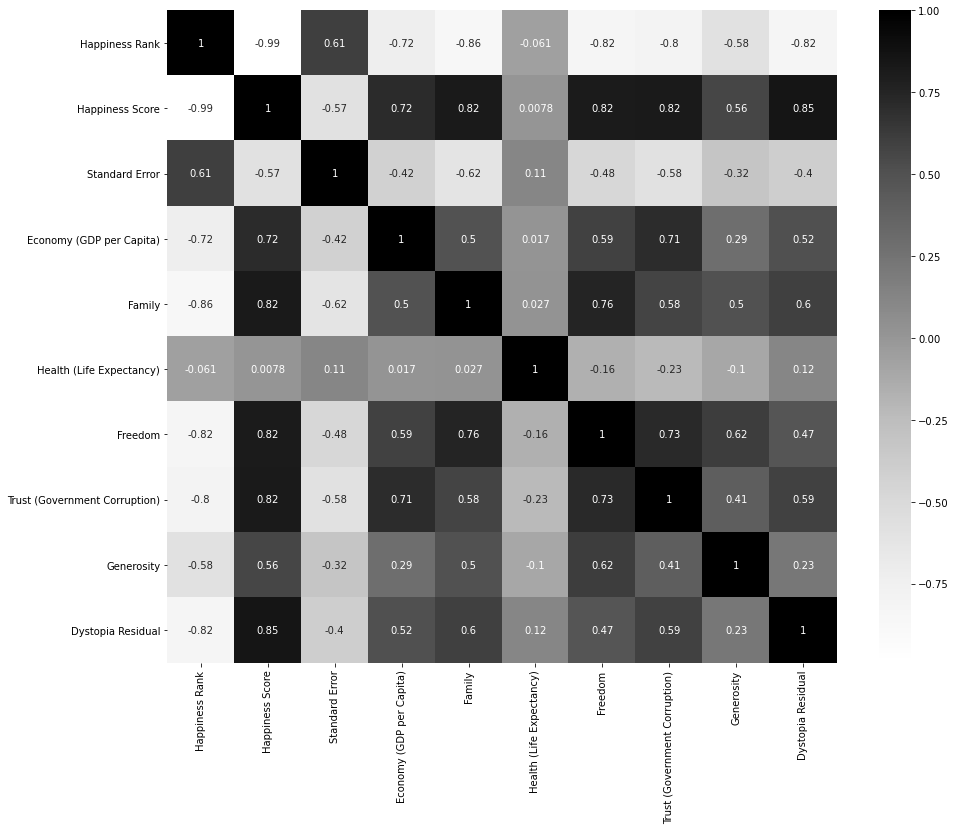

In [19]:
plt.figure(figsize=(15,12))
west_europe = y_5.loc[lambda y_5 : y_5['Region'] == 'Western Europe']
sns.heatmap(west_europe.corr(), cmap = 'Greys', annot = True)
plt.show()

*It seems that the highly correlated features are Family, Freedom and Trust in Western Europe*

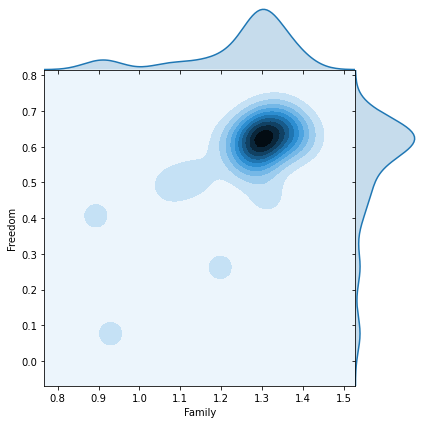

In [20]:
sns.jointplot('Family', 'Freedom', data=west_europe, kind='kde', space=0)

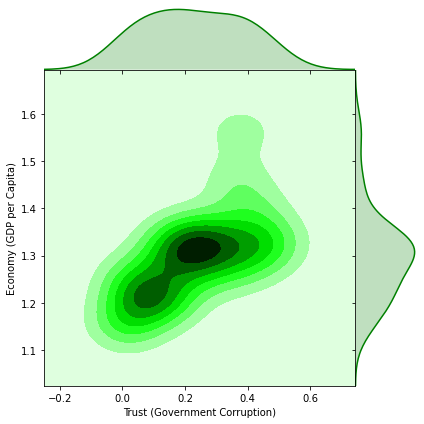

In [21]:
sns.jointplot('Trust (Government Corruption)', 'Economy (GDP per Capita)', data=west_europe, kind='kde', space=0, color='g')

*This looks like a normal (Gaussian) distribution.*

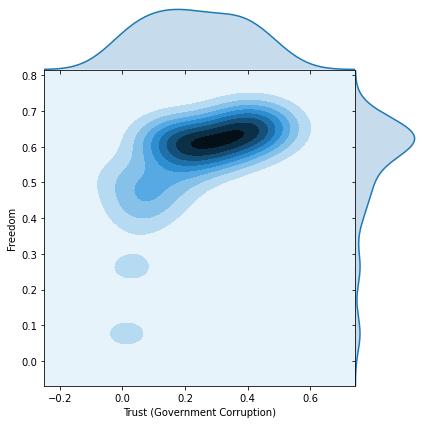

In [22]:
sns.jointplot('Trust (Government Corruption)', 'Freedom', data=west_europe, kind='kde', space=0)

*Looks like Freedom is highly correlated with Family and Trust(So, if you want to predict happiness scores, you better eliminate Freedom as it could lead to multicollinearity).*

* **Correlation for Eastern Asia**

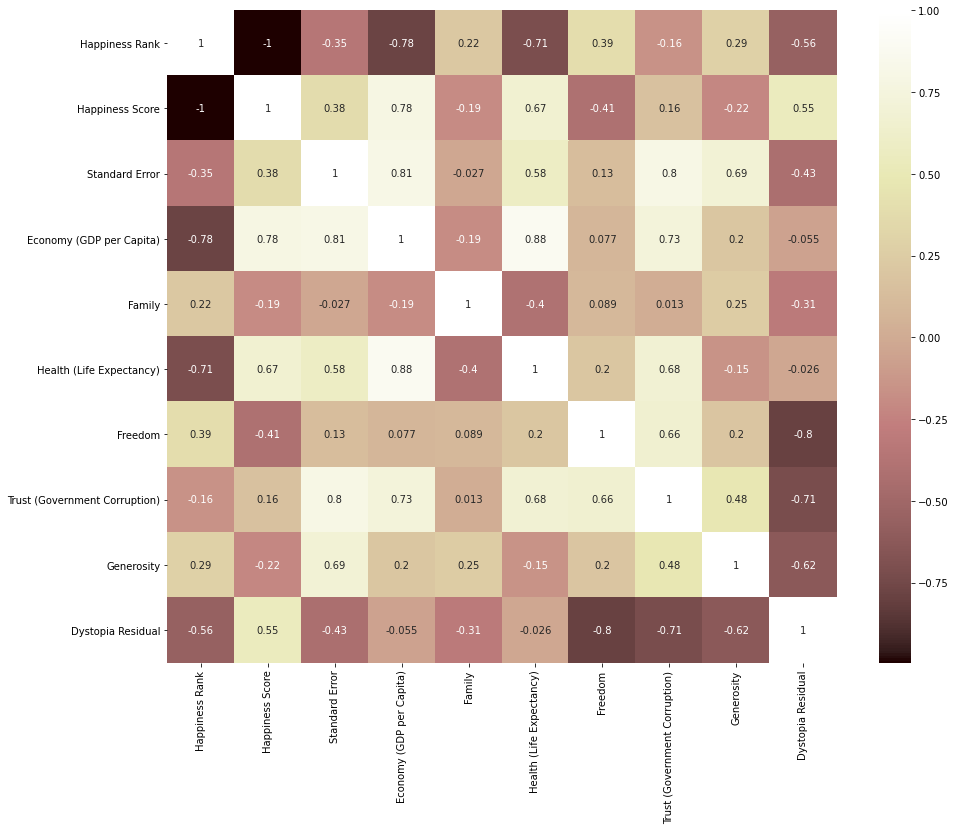

In [23]:
plt.figure(figsize=(15,12))
east_asia = y_5.loc[lambda y_5 : y_5['Region'] == 'Eastern Asia']
sns.heatmap(east_asia.corr(), cmap = 'pink', annot = True)
plt.show()

*In Eastern Asia, Economy and Health seems to be the most important factors responsible for Happiness.*

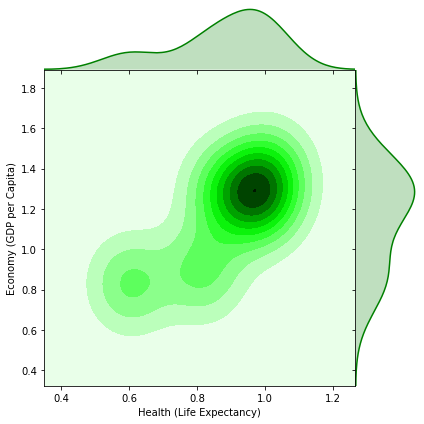

In [24]:
sns.jointplot('Health (Life Expectancy)', 'Economy (GDP per Capita)', data=east_asia, kind='kde', space=0, color='g')

*Economy and Health seems to be highly correlated, so one of them should be eliminated in order to remove multicollinearity for prediction purposes.*

* **Correlation for Middle East and Northern Africa**

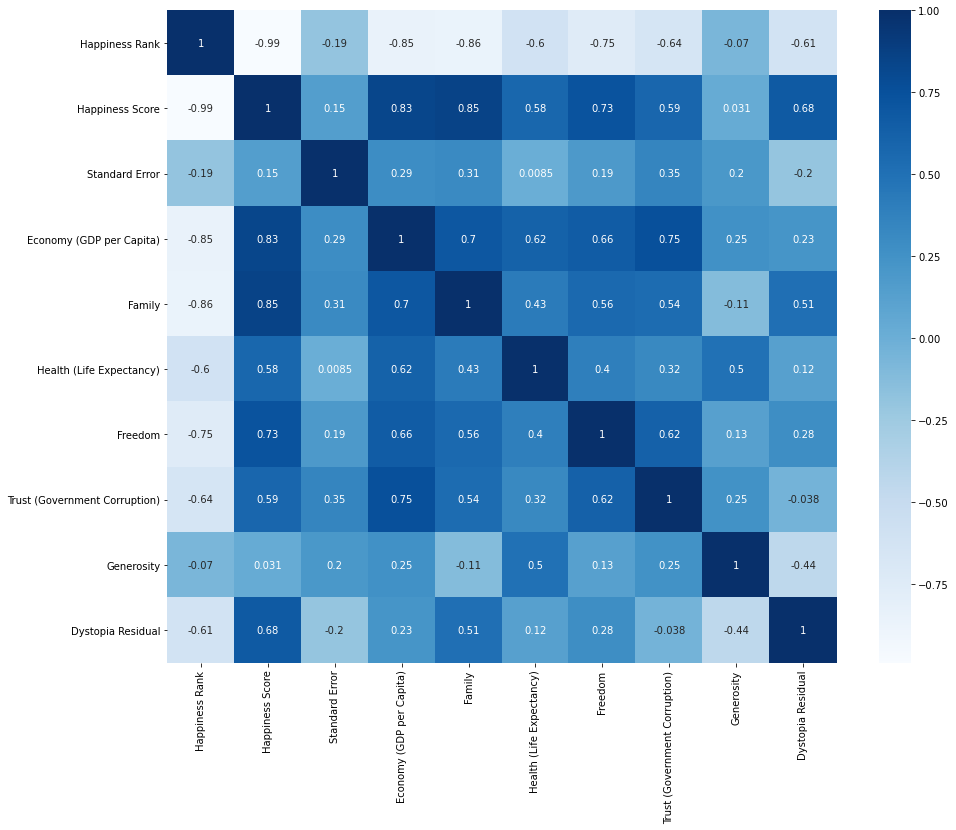

In [25]:
plt.figure(figsize=(15,12))
middle_east = y_5.loc[lambda y_5 : y_5['Region'] == 'Middle East and Northern Africa']
sns.heatmap(middle_east.corr(), cmap = 'Blues', annot = True)
plt.show()

*In Middle East and Northern Africa, Economy, Family and Freedom are the factors of uttermost importance(This explains the reason why Syria is in the worst 3 countries because the freedom is restricted and this country is under the control of ISIS).*

* **Correlation for North America**

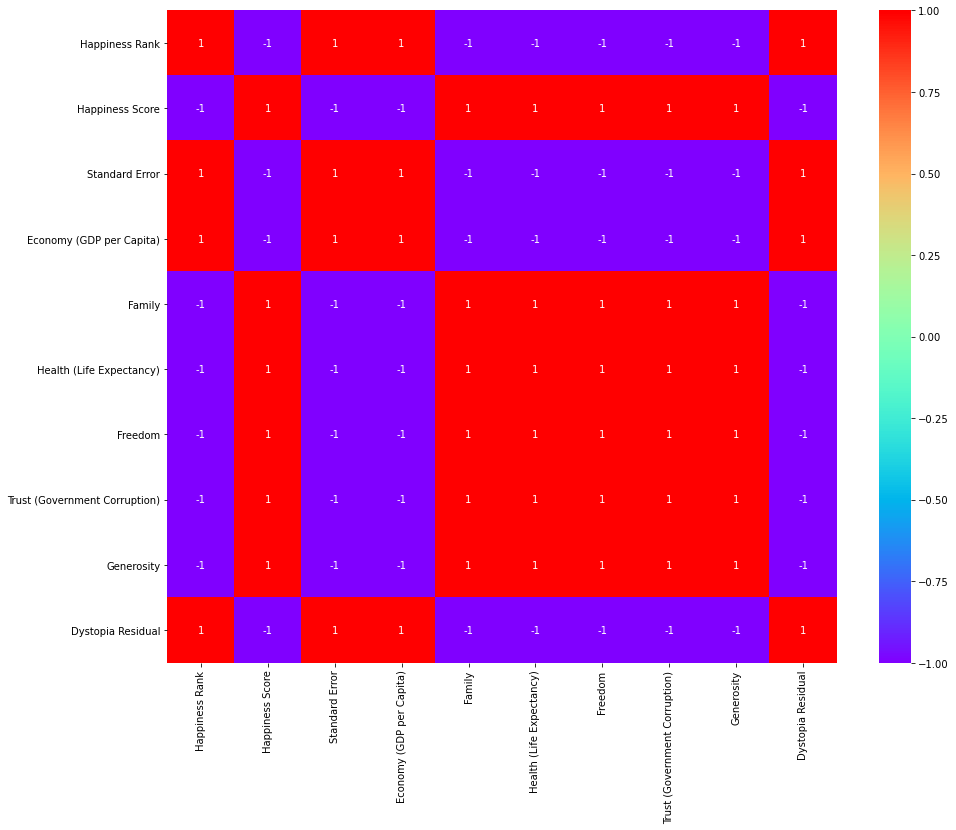

In [26]:
plt.figure(figsize=(15,12))
north_america = y_5.loc[lambda y_5 : y_5['Region'] == 'North America']
sns.heatmap(north_america.corr(), cmap = 'rainbow', annot = True)
plt.show()

*Everything in this continent make the people happy and since USA is the most developed nation of the world, I am not surprised that North America is in the top 10 happy countries.*

* **Correlation for Sub-Saharan Africa**

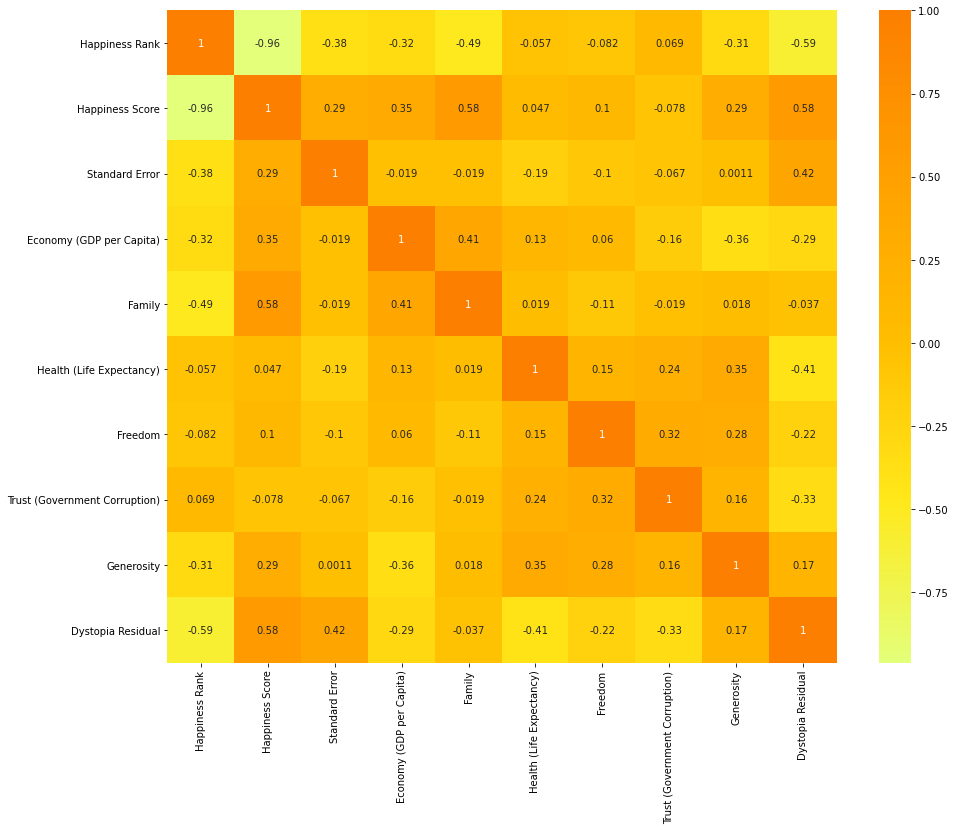

In [27]:
plt.figure(figsize=(15,12))
africa = y_5.loc[lambda y_5 : y_5['Region'] == 'Sub-Saharan Africa']
sns.heatmap(africa.corr(), cmap = 'Wistia', annot = True)
plt.show()

*The most important factors for happiness in Sub-Saharan Africa is Family.*

*Let's see top countries in each sector(features).*

In [28]:
# Getting top 10 countries in each sector
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

for col in cols:
    print(y_5[['Country', col]].sort_values(by = col,
    ascending = False).head(10))
    print("\n")

                 Country  Economy (GDP per Capita)
27                 Qatar                   1.69042
16            Luxembourg                   1.56391
38                Kuwait                   1.55422
23             Singapore                   1.52186
3                 Norway                   1.45900
19  United Arab Emirates                   1.42727
0            Switzerland                   1.39651
34          Saudi Arabia                   1.39541
14         United States                   1.39451
71             Hong Kong                   1.38604


        Country   Family
1       Iceland  1.40223
17      Ireland  1.36948
2       Denmark  1.36058
0   Switzerland  1.34951
43   Uzbekistan  1.34043
3        Norway  1.33095
4        Canada  1.32261
8   New Zealand  1.31967
5       Finland  1.31826
35        Spain  1.31379


        Country  Health (Life Expectancy)
23    Singapore                   1.02525
71    Hong Kong                   1.01328
45        Japan                   

# My Conclusion

*What I concluded from this notebook is that all factors are equally important in maintaining happiness and peace among the people. No factor alone could decide the happiness among any nation's people.*

**Hope you liked this notebook and learned something new. If you did, then please vote, it would mean a lot to me and let me know what can I do to improve myself in the comments. THANK YOU!!!!**